### Sample code for Principal Component Analysis (PCA)  

#### Import libraries  

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Parameters  

In [15]:
csv_in = 'dm-mid-p5.csv'

# To show all rows and columns in the results 
pd.options.display.max_columns=999
pd.options.display.max_rows=999

#### Read CSV file  

In [16]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(40, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Jpn     40 non-null     int64
 1   Eng     40 non-null     int64
 2   Math    40 non-null     int64
 3   Phys    40 non-null     int64
 4   Chem    40 non-null     int64
dtypes: int64(5)
memory usage: 1.7 KB
None


,Jpn,Eng,Math,Phys,Chem
0,59,57,50,54,46
1,43,45,47,50,48
2,48,42,57,57,57
3,46,46,60,61,54
4,40,36,31,32,36


#### Set data  

In [17]:
dfX = df
print(dfX.shape)
display(dfX.head())

(40, 5)


,Jpn,Eng,Math,Phys,Chem
0,59,57,50,54,46
1,43,45,47,50,48
2,48,42,57,57,57
3,46,46,60,61,54
4,40,36,31,32,36


#### Standardization  

In [18]:
sc = StandardScaler()
X_std = sc.fit_transform(dfX)
print(X_std)
print(X_std.shape)

[[ 1.02285686  1.02698457  0.04442229  0.50992126 -0.56222783]
 [-1.18872554 -0.7462262  -0.33634019  0.0355759  -0.30811356]
 [-0.49760604 -1.18952889  0.93286807  0.86568027  0.83540067]
 [-0.77405384 -0.59845863  1.31363055  1.34002563  0.45422926]
 [-1.60339723 -2.07613428 -2.36707341 -2.0989782  -1.83279919]
 [ 1.02285686 -0.00738838  1.18670973  0.50992126  0.83540067]
 [-0.91227774 -1.18952889 -0.33634019 -0.08301044 -1.57868492]
 [-1.87984503 -0.30292351 -0.33634019  0.15416224 -0.56222783]
 [ 1.16108076  0.58368188  0.93286807  0.39133492  1.08951494]
 [ 1.71397635  1.91358996  1.94823468  2.88164803  2.99537199]
 [ 0.19351346 -0.7462262  -2.11323176 -1.15028749 -0.18105642]
 [-0.63582994 -0.45069107 -0.20941936 -0.20159678  0.07305785]
 [-0.22115824 -1.33729646 -0.20941936  0.98426661  0.96245781]
 [ 0.19351346  0.58368188  1.0597889   1.34002563  1.21657208]
 [-0.08293434  0.73144944  0.55210559  0.39133492  1.21657208]
 [ 1.16108076 -0.15515594 -0.84402349 -1.38746016 -0.43

#### PCA  

In [19]:
n_pca = 5
pca = PCA(n_components=n_pca)
X_pca = pca.fit_transform(X_std)

#### PC coordinates  

In [20]:
print(X_pca.shape)
print(X_pca[:5])

(40, 5)
[[ 0.77824682  1.07233743 -0.61079973 -0.69629474  0.25602392]
 [-1.0325104  -1.01465555 -0.16039187  0.0982874   0.21967407]
 [ 0.59231526 -1.72395192  0.72275579 -0.25695821 -0.26244842]
 [ 0.96535162 -1.86983091 -0.14143834 -0.43522597 -0.21756003]
 [-4.47765589 -0.11781266  0.34941279  0.19302839  0.16273811]]


#### Check contribution ratio  

In [21]:
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

[0.64671026 0.21353731 0.06909157 0.03560072 0.03506014]
[0.64671026 0.86024757 0.92933913 0.96493986 1.        ]


#### Draw graph of contribution  

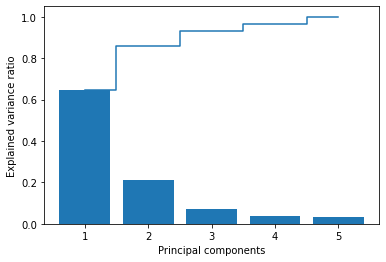

In [22]:
xx = range(1, n_pca+1)
plt.bar(xx, pca.explained_variance_ratio_)
plt.step(xx, np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

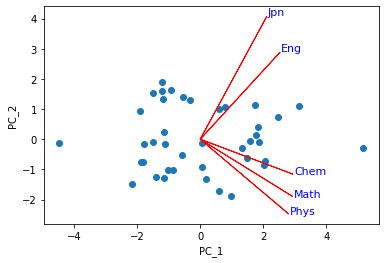

In [24]:
def biplot(X_2d, coef_2d, coef_labels=None):
    r1 = 6
    r2 = 1.01
    coef_2dT = coef_2d.T
    if coef_labels is None:
        coef_labels = range(len(coef_2dT))
    for i, coef in enumerate(coef_2dT):
        plt.arrow(0, 0, coef[0]*r1, coef[1]*r1, color='r')    
        plt.text(coef[0]*r1*r2, coef[1]*r1*r2, coef_labels[i],
                 color='b', fontsize=11)
    plt.scatter(X_2d[:,0], X_2d[:,1])
    plt.xlabel('PC_1')
    plt.ylabel('PC_2')
    return None

biplot(X_pca[:, :2], pca.components_[:2], coef_labels=dfX.columns)